## DBScan



Esse notebook mostra uma forma de se implementar o agrupamento baseado em densidade

Imports utilizados

In [53]:
#Bilioteca para medição da distrância DTW
!pip install dtw-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import random
#pip install dtw-python
from dtw import *

**Estratégia** de implementação - Definição das funções básicas e classe DBScan

In [55]:
# Calcula a matriz de distrâncias utilizando o conjunto de dados X e a funcao_distancia escolhida
def getMatrizDist(X, func_dist):
  size=X.shape[0]
  matriz_dist=np.zeros((size, size))
  #Preenche a Mariz  
  for i in range(0,size):
    for j in  range(i,size):
      matriz_dist[i][j]=func_dist(X[i],X[j])
      matriz_dist[j][i]=matriz_dist[i][j]
  return matriz_dist

# Calcula a matriz de vizinhança que atende a dinstância mínima de Epsilon para cada ponto
def getVizinhos(X,matriz_dist, Epsilon):
  vizinhos=[]
  size=X.shape[0]
  for i in range(0,size):
    linha =[]
    for j in  range(0,size):
      # Se a distância entre os pontos i e j for menor que o raio Epsilon então o ponto pertence ao cluster.
      if matriz_dist[i][j] < Epsilon:   
        linha.append(j)
    # Adiciona ao vetor com a lista dos pontos que fazem vizinhança com o elemento de índice i
    vizinhos.append(linha)    
  return vizinhos  


def get_ClustersDBScan(X,clusters,Epsilon, minPoints, vizinhos):
  n_grupo = 0  
  for i in range(0,X.shape[0]):
    if clusters[i] is not 0:
      continue
    n_vizinhos = vizinhos[i]
    
    if(len(n_vizinhos) < minPoints): # ruído
      clusters[i]=-1
    else: # Se não for ruído expande o cluster até o limite da vizinhança recursivamente
      n_grupo +=1
      expandir(X, clusters, i, n_vizinhos, n_grupo, minPoints, vizinhos)

#Função para expandir o cluster até o limite da vizinhança recursivamente
def expandir(X, clusters, i, n_vizinhos, n_grupo, minPoints, vizinhos):
    clusters[i] = n_grupo
    j = 0
    while j < len(n_vizinhos):
        
        prox = n_vizinhos[j]
        
        if clusters[prox] == -1:
            clusters[prox] = n_grupo
        
        elif clusters[prox] == 0:
            clusters[prox] = n_grupo           
            prox_vizinhos = vizinhos[prox]
            
            if len(prox_vizinhos) >= minPoints:
                expandir(X, clusters, prox, prox_vizinhos, n_grupo, minPoints, vizinhos)
        
        j += 1


In [56]:
 class DBScan:
   #construtor
   def __init__(self, Raio, minPoints, func_dist):
        self.Epsilon = Raio   # O raio máximo
        self.minPoints = minPoints # o número mínimo de pontos
        self.func_dist = func_dist  # Métrica de distância escolhida        
        self.vizinhos=[] # vetor com a lista dos pontos que fazem vizinhança com o elemento de índice i
        self.matriz_dist=[] #  matriz de distrâncias 
    
   #função de predição para agrupamento por densidade para um conjunto de pontos X
   def predict(self, X):           
        clusters = [0] * X.shape[0]
        self.matriz_dist=getMatrizDist(X, self.func_dist)
        self.vizinhos=getVizinhos(X, self.matriz_dist, self.Epsilon)
        get_ClustersDBScan(X, clusters, self.Epsilon, self.minPoints, self.vizinhos)                
        return clusters
        

Testando a Classe DBScan 

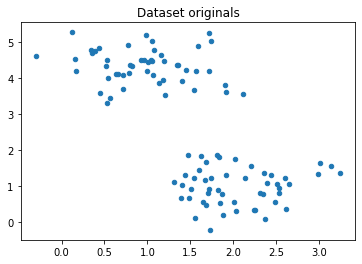

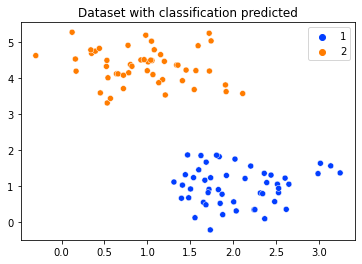

In [57]:
# Gera  clusters de pontos aleatórios 
from sklearn.datasets import make_blobs
MAX_RANGE=100
X, rotulo = make_blobs(n_samples=MAX_RANGE, centers=2, cluster_std=0.5,random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.title("Dataset originals")
plt.show()

#Definição dos hiperparâmetros
Raio =  1.5 # Raio máximo da vizinhança
minPoints = 5 # Número mínimo de pontos em um raio de vizinhança para um dado ponto.
funcao_distancia = distance.euclidean   # distance.minkowski  distance.cosine distance.euclidean

#Instancia o DBScan e faz a predição
clusters = DBScan(Raio, minPoints, funcao_distancia).predict(X) 

#Exibie os resultados
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='bright')
plt.title("Dataset with classification predicted")
plt.show();

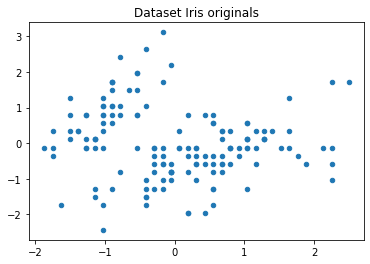

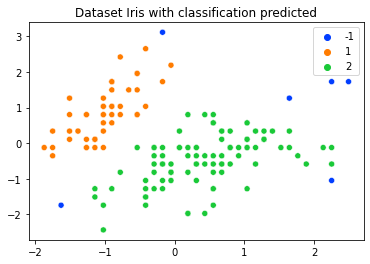

In [58]:
# Exemplo 02 de aplicação da classe DBScan com o dataset Iris

# Gera pontos do dataset Iris do UCI
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["Sepal Length","Sepal Width","Petal Length","Petal Width","Class"])
df_iris.drop('Class', axis=1, inplace=True)
X = StandardScaler().fit_transform(df_iris)

plt.scatter(X[:, 0], X[:, 1], s=20);
plt.title("Dataset Iris originals")
plt.show()

#Definição dos hiperparâmetros
Raio =  0.85 # Raio máximo da vizinhança
minPoints = 7 # Número mínimo de pontos em um raio de vizinhança para um dado ponto.
funcao_distancia = distance.euclidean

#Instancia o DBScan e faz a predição
clusters = DBScan(Raio, minPoints, funcao_distancia).predict(X) 

#Exibie os resultados
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='bright')
plt.title("Dataset Iris with classification predicted")
plt.show();